In [1]:
#DOWNLOAD DIVIDEND DATA
import yfinance as yf
import pandas as pd
from tqdm import tqdm

# ─── 100 Nasdaq-100 Tickers ───────────────────────────────────────────────────────
nasdaq_100_tickers = [
    'ADBE','AMD','ABNB','GOOGL','GOOG','AMZN','AEP','AMGN','ADI','ANSS',
    'AAPL','AMAT','APP','ARM','ASML','AZN','TEAM','ADSK','ADP','AXON',
    'BKR','BIIB','BKNG','AVGO','CDNS','CDW','CHTR','CTAS','CSCO','CCEP',
    'CTSH','CMCSA','CEG','CPRT','CSGP','COST','CRWD','CSX','DDOG','DXCM',
    'FANG','DASH','EA','EXC','FAST','FTNT','GEHC','GILD','HON','IDXX',
    'INTC','INTU','ISRG','KDP','KLAC','KHC','LRCX','LIN','LULU','MAR',
    'MRVL','MELI','META','MCHP','MU','MSFT','MSTR','MDLZ','MDB','MNST',
    'NFLX','NVDA','NXPI','ORLY','ODFL','ON','PCAR','PLTR','PANW','PAYX',
    'PYPL','PDD','PEP','QCOM','REGN','ROP','ROST','SBUX','SNPS','TTWO',
    'TMUS','TSLA','TXN','TTD','VRSK','VRTX','WBD','WDAY','XEL','ZS'
]
# ────────────────────────────────────────────────────────────────────────────────

dividend_data = []

for ticker in tqdm(nasdaq_100_tickers, desc="Fetching dividend data"):
    try:
        div = yf.Ticker(ticker).dividends
        if not div.empty:
            df = div.reset_index()
            df.columns = ['Date', 'Dividend']
            df['Ticker'] = ticker
            dividend_data.append(df)
    except Exception as e:
        print(f"Failed for {ticker}: {e}")

if dividend_data:
    all_dividends_df = pd.concat(dividend_data, ignore_index=True)
    all_dividends_df.to_csv("nasdaq_100_dividends.csv", index=False)
    print("✅ Dividend data saved to nasdaq_100_dividends.csv")
else:
    print("❌ No dividend data fetched.")


Fetching dividend data: 100%|██████████| 100/100 [00:28<00:00,  3.46it/s]

✅ Dividend data saved to nasdaq_100_dividends.csv


In [3]:
# DOWNLOAD PRICE DATA
import yfinance as yf
import pandas as pd
from tqdm import tqdm

tickers = [
     'ADBE','AMD','ABNB','GOOGL','GOOG','AMZN','AEP','AMGN','ADI','ANSS',
    'AAPL','AMAT','APP','ARM','ASML','AZN','TEAM','ADSK','ADP','AXON',
    'BKR','BIIB','BKNG','AVGO','CDNS','CDW','CHTR','CTAS','CSCO','CCEP',
    'CTSH','CMCSA','CEG','CPRT','CSGP','COST','CRWD','CSX','DDOG','DXCM',
    'FANG','DASH','EA','EXC','FAST','FTNT','GEHC','GILD','HON','IDXX',
    'INTC','INTU','ISRG','KDP','KLAC','KHC','LRCX','LIN','LULU','MAR',
    'MRVL','MELI','META','MCHP','MU','MSFT','MSTR','MDLZ','MDB','MNST',
    'NFLX','NVDA','NXPI','ORLY','ODFL','ON','PCAR','PLTR','PANW','PAYX',
    'PYPL','PDD','PEP','QCOM','REGN','ROP','ROST','SBUX','SNPS','TTWO',
    'TMUS','TSLA','TXN','TTD','VRSK','VRTX','WBD','WDAY','XEL','ZS'
]

start_date = "2000-01-01"
end_date = None  # Defaults to today

all_data = []

for ticker in tqdm(tickers, desc="Downloading stock data"):
    try:
        df = yf.download(ticker, start=start_date, end=end_date, progress=False)
        if not df.empty:
            df = df.reset_index()
            df['Ticker'] = ticker
            df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']
            all_data.append(df)
    except Exception as e:
        print(f"Error fetching {ticker}: {e}")

# Combine all into one DataFrame with shared columns
combined_df = pd.concat(all_data, axis = 0, ignore_index=True)

# Optional: sort by date and ticker
combined_df = combined_df.sort_values(by=['Ticker', 'Date'])
print(combined_df.head())

combined_df.to_csv('stock_prices.csv', index=False)



YF.download() has changed argument auto_adjust default to True


1 Failed download:
['ANSS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2025-10-24) (Yahoo error = "No data found, symbol may be delisted")')


            Date      Open      High       Low     Close     Volume Ticker
50835 2000-01-03  0.840094  0.844316  0.763168  0.787090  535796800   AAPL
50836 2000-01-04  0.769266  0.830244  0.759415  0.812419  512377600   AAPL
50837 2000-01-05  0.780523  0.829775  0.773018  0.778647  778321600   AAPL
50838 2000-01-06  0.712977  0.803038  0.712977  0.796471  767972800   AAPL
50839 2000-01-07  0.746750  0.758008  0.716731  0.724235  460734400   AAPL


         Date      Open      High       Low     Close     Volume Ticker
0  2000-01-03  0.840094  0.844316  0.763168  0.787090  535796800   AAPL
1  2000-01-04  0.769266  0.830244  0.759415  0.812419  512377600   AAPL
2  2000-01-05  0.780523  0.829775  0.773018  0.778647  778321600   AAPL
3  2000-01-06  0.712977  0.803038  0.712977  0.796471  767972800   AAPL
4  2000-01-07  0.746750  0.758008  0.716731  0.724235  460734400   AAPL


C:\Users\vojta\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


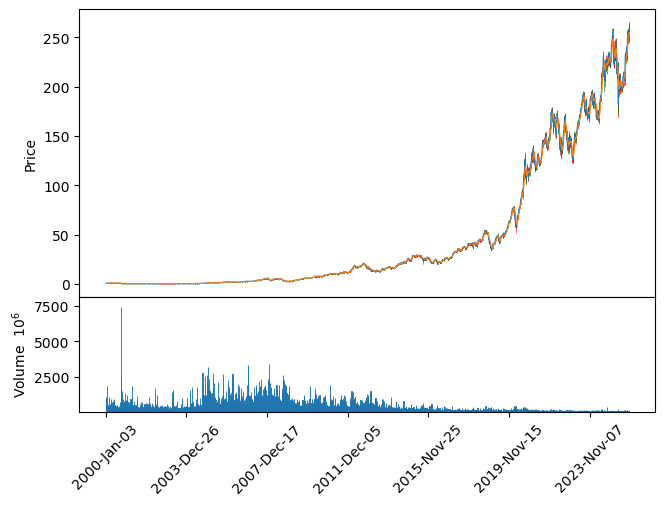

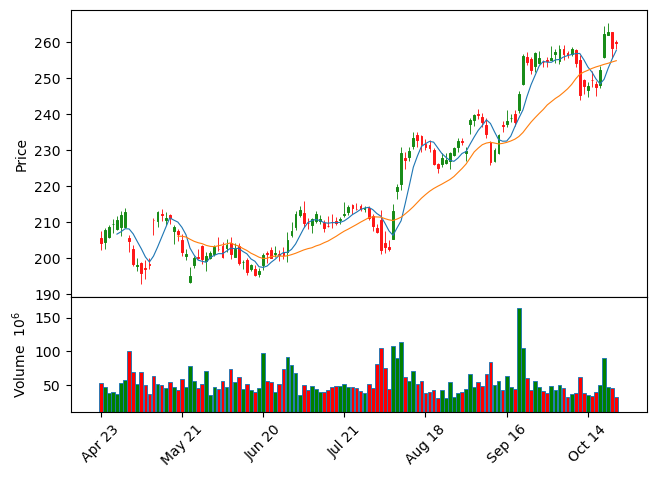

In [7]:
#CANDLESTICK CHART OF AAPL 2025
import yfinance as yf
import pandas as pd
from tqdm import tqdm
import mplfinance as mpf
stock_data_df = pd.read_csv("stock_prices.csv")
print(stock_data_df.head())
aapl_data = stock_data_df[stock_data_df['Ticker'] == 'AAPL'].copy()
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])  # Convert to datetime
aapl_data.set_index('Date', inplace=True)  # Set as index

#need to switch candlestick colors, in default they show opposite colors
mc = mpf.make_marketcolors(
    up='red',     # normally green
    down='green', # normally red
    edge='i',     # inherit from up/down
    wick='i',
    volume='in'   # same as candle color
)

s = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(aapl_data, type='candle', mav=(5,20), style=s, volume = True)

# 3. Sort by date (newest first) and get last 6 months
aapl_data = aapl_data.sort_index(ascending=True)  # Sort oldest to newest
last_date = aapl_data.index[-1]  # Get most recent date
six_months_ago = last_date - pd.DateOffset(months=6)  # Calculate 6 months back
recent_data = aapl_data.loc[six_months_ago:last_date]

mpf.plot(recent_data, type='candle', mav=(5,20), style=s, volume = True)

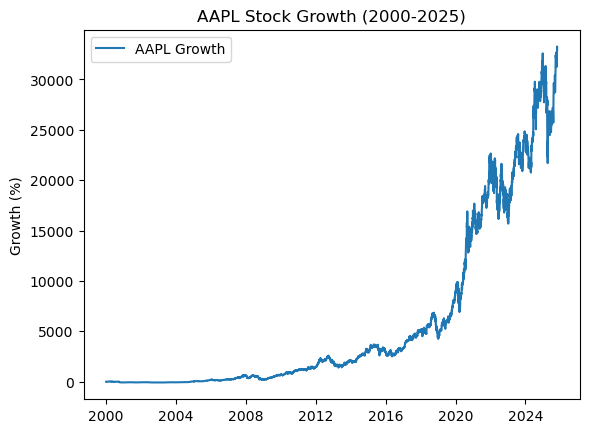

In [9]:
# PERCENTAGE GROWTH 2000-2025 APPLE

aapl_data['Growth_Pct'] = (aapl_data['Close'] / aapl_data['Close'].iloc[0] - 1) * 100
aapl_data.to_csv('aapl_data.csv', index=False)

cols = aapl_data.columns.tolist()
cols.insert(-1, cols.pop(cols.index('Growth_Pct')))  # Move to second-to-last position
aapl_data = aapl_data[cols]

import matplotlib.pyplot as plt
plt.plot(aapl_data.index, aapl_data['Growth_Pct'], label='AAPL Growth')
plt.title('AAPL Stock Growth (2000-2025)')
plt.ylabel('Growth (%)')
plt.legend()
plt.show()

In [11]:
#CREATE A TEMP DATAFRAME CONTAINING DATA ONLY BETWEEN 2020-2025
print(stock_data_df.head())
stock_data_df['Date'] = pd.to_datetime(stock_data_df['Date'], errors='coerce')
df_2020_2025 = stock_data_df[(stock_data_df['Date'].dt.year >= 2020) & (stock_data_df['Date'].dt.year <= 2025)]
print(df_2020_2025.head())
#RESET INDEX VALUES
df_2020_2025 = df_2020_2025.reset_index(drop=True)

         Date      Open      High       Low     Close     Volume Ticker
0  2000-01-03  0.840094  0.844316  0.763168  0.787090  535796800   AAPL
1  2000-01-04  0.769266  0.830244  0.759415  0.812419  512377600   AAPL
2  2000-01-05  0.780523  0.829775  0.773018  0.778647  778321600   AAPL
3  2000-01-06  0.712977  0.803038  0.712977  0.796471  767972800   AAPL
4  2000-01-07  0.746750  0.758008  0.716731  0.724235  460734400   AAPL
           Date       Open       High        Low      Close     Volume Ticker
5031 2020-01-02  72.538498  72.598876  71.292289  71.545875  135480400   AAPL
5032 2020-01-03  71.833298  72.594063  71.608692  71.765674  146322800   AAPL
5033 2020-01-06  72.405670  72.444313  70.703005  70.954181  118387200   AAPL
5034 2020-01-07  72.065147  72.671341  71.845369  72.415337  108872000   AAPL
5035 2020-01-08  73.224403  73.526295  71.768079  71.768079  132079200   AAPL


In [13]:
#FIND THE 15 MOST GROWING STOCKS BETWEEN 2020-2025
first_last = df_2020_2025.groupby('Ticker').agg(
    start_price=('Close', 'first'),
    end_price=('Close', 'last')
)

# Calculate percentage growth
first_last['Total_Growth_%'] = ((first_last['end_price'] - first_last['start_price']) 
                                 / first_last['start_price']) * 100

# Sort and pick top 15
top_15 = first_last.sort_values('Total_Growth_%', ascending=False).head(15)

top_15_tickers = top_15.index.tolist()
print(top_15_tickers)

['NVDA', 'MSTR', 'PLTR', 'TSLA', 'AVGO', 'CRWD', 'CEG', 'AXON', 'APP', 'ZS', 'KLAC', 'PANW', 'LRCX', 'AMD', 'CDNS']


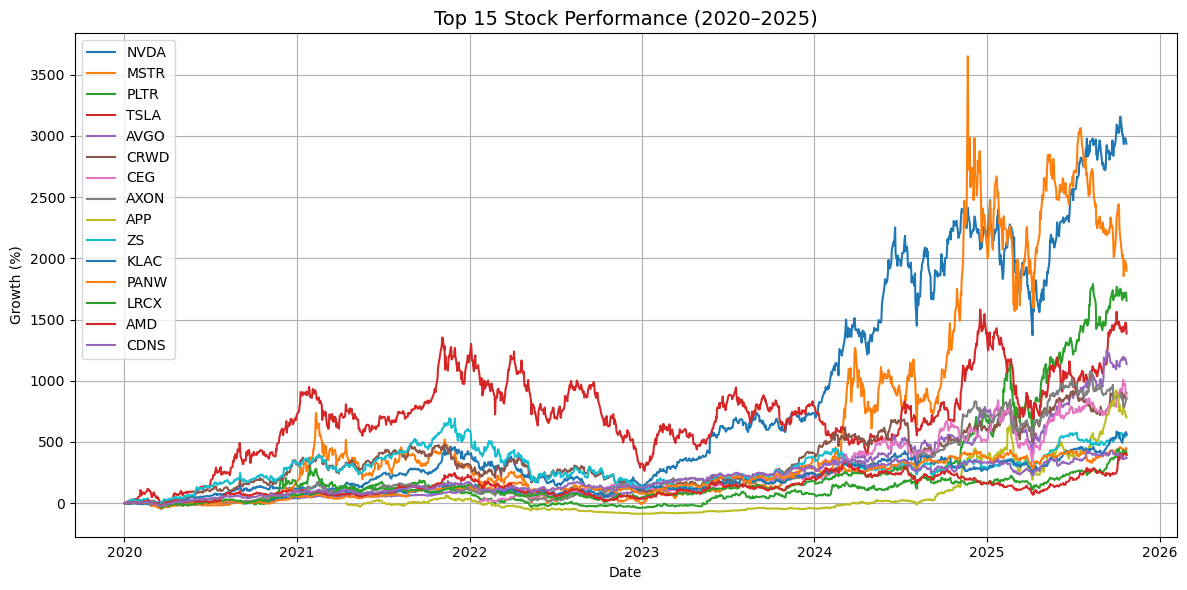

In [15]:
df_top15 = df_2020_2025[df_2020_2025['Ticker'].isin(top_15_tickers)].copy()
df_top15.to_csv("df_top15.csv", index = False)
# Calculate cumulative growth from start for each ticker
df_top15['Growth_%'] = df_top15.groupby('Ticker')['Close'].transform(
    lambda x: (x / x.iloc[0] - 1) * 100)
# Plot
plt.figure(figsize=(12, 6))
for ticker in (top_15_tickers):
    ticker_data = df_top15[df_top15['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Growth_%'], label=ticker)

plt.title("Top 15 Stock Performance (2020–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Growth (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Sort and pick top 5
top_5 = first_last.sort_values('Total_Growth_%', ascending=False).head(5)

top_5_tickers = top_5.index.tolist()
print(top_5_tickers)

['NVDA', 'MSTR', 'PLTR', 'TSLA', 'AVGO']


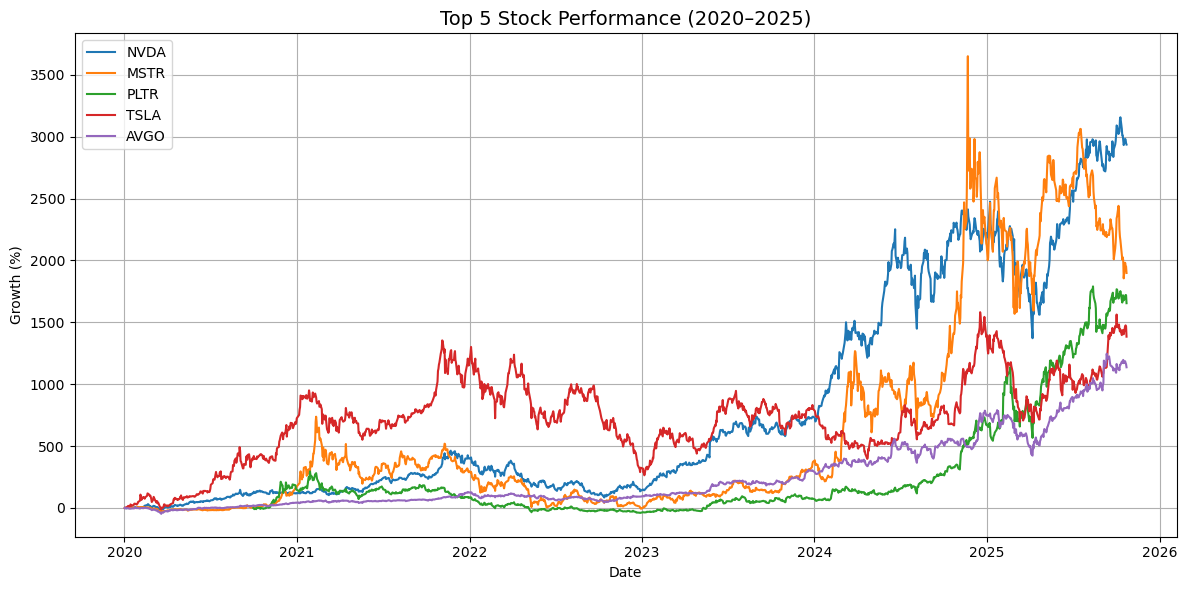

In [19]:
#TOP 5 STOCKS COMPARISON
df_top5 = df_2020_2025[df_2020_2025['Ticker'].isin(top_5_tickers)].copy()
df_top5.to_csv("df_top15.csv", index = False)
# Calculate cumulative growth from start for each ticker
df_top5['Growth_%'] = df_top5.groupby('Ticker')['Close'].transform(
    lambda x: (x / x.iloc[0] - 1) * 100)
# Plot
plt.figure(figsize=(12, 6))
for ticker in (top_5_tickers):
    ticker_data = df_top5[df_top5['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Growth_%'], label=ticker)

plt.title("Top 5 Stock Performance (2020–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Growth (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()